Paskah Riverdi Manurung

Bina Nusantara University

Pontianak, Kalimantan Barat

In [ ]:
import tensorflow as tf
import os
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-06 03:31:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.37MB/s    in 88s     

2021-07-06 03:33:03 (3.50 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile (local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
!pip install split-folders
!pip install split-folders tqdm
import splitfolders

splitfolders.ratio ('/tmp/rockpaperscissors/rps-cv-images', output = '/tmp/rockpaperscissors/file_akhir', seed = 1337, ratio = (.6, .4))

Copying files: 2188 files [00:00, 3238.46 files/s]


In [ ]:
base_dir = '/tmp/rockpaperscissors/file_akhir'

train_dir = os.path.join (base_dir, 'train')
val_dir = os.path.join (base_dir, 'val')

In [ ]:
generator = ImageDataGenerator (
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)

In [ ]:
train = generator.flow_from_directory (
    train_dir,
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'categorical',
)

Found 1312 images belonging to 3 classes.


In [ ]:
val = generator.flow_from_directory (
    val_dir,
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit (
    train,
    steps_per_epoch = 10,
    epochs = 20,
    validation_data = val,
    validation_steps = 10,
    verbose = 'auto'
)

Epoch 1/20
10/10 [==============================] - 37s 4s/step - loss: 1.1146 - accuracy: 0.4000 - val_loss: 1.0531 - val_accuracy: 0.4656
Epoch 2/20
10/10 [==============================] - 35s 4s/step - loss: 1.0042 - accuracy: 0.4969 - val_loss: 0.8794 - val_accuracy: 0.5906
Epoch 3/20
10/10 [==============================] - 35s 4s/step - loss: 0.8612 - accuracy: 0.6219 - val_loss: 0.7216 - val_accuracy: 0.7188
Epoch 4/20
10/10 [==============================] - 35s 4s/step - loss: 0.6614 - accuracy: 0.7625 - val_loss: 0.6090 - val_accuracy: 0.7500
Epoch 5/20
10/10 [==============================] - 35s 4s/step - loss: 0.5279 - accuracy: 0.8062 - val_loss: 0.5209 - val_accuracy: 0.8062
Epoch 6/20
10/10 [==============================] - 35s 4s/step - loss: 0.4152 - accuracy: 0.8594 - val_loss: 0.4880 - val_accuracy: 0.8062
Epoch 7/20
10/10 [==============================] - 35s 4s/step - loss: 0.3819 - accuracy: 0.8656 - val_loss: 0.3105 - val_accuracy: 0.8969
Epoch 8/20
10/10 [==

Saving 1.jpg to 1.jpg
[[0. 1. 0.]]
1.jpg
rock


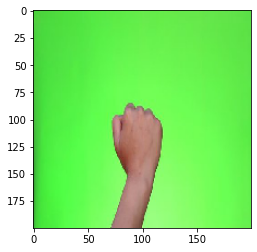

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print  (classes)
  output = np.argmax (classes)
  print(fn)
  if output == 0:
    print('paper')
  elif output == 1:
    print('rock')
  else:
    print ('scissors')